### In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. 

In [105]:
# importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score,cohen_kappa_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [3]:
german_data = pd.read_csv(r'C:/Users/palva/Downloads/Analytics_projects_personal/german_credit/german_credit_data.csv',index_col=0)

In [4]:
german_data.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [5]:
german_data.shape

(1000, 10)

In [6]:
german_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [7]:
german_data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [8]:
german_data['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [9]:
german_data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [10]:
german_data.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [11]:
# imputing the missing values
german_data['Saving accounts']  =german_data['Saving accounts'].fillna('No_Saving_Acc')
german_data['Checking account']  =german_data['Checking account'].fillna('No_Checking_Acc')

In [12]:
german_data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [13]:
german_data['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

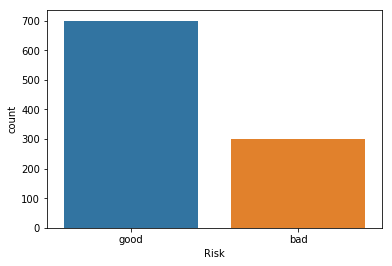

In [14]:
#analysis of target column
sns.countplot(german_data['Risk'])

In [15]:
german_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,No_Saving_Acc,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,No_Checking_Acc,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [16]:
#Risk vs gender
pd.crosstab(german_data['Sex'],german_data['Risk'])

Risk,bad,good
Sex,,
female,109,201
male,191,499


In [17]:
#trace0 = go.Bar(x=german_data[german_data['Risk']=='good']['Housing'].value_counts().index.values,
              # y = german_data[german_data['Risk']=='good']['Housing'].value_counts().values,name='good_credit')
#trace1 = go.Bar(x=german_data[german_data['Risk']=='bad']['Housing'].value_counts().index.values,
               #y=german_data[german_data['Risk']=='bad']['Housing'].value_counts().values, name='bad_credit')
#data1 = [trace0,trace1]
#layout = go.Layout(title='Housing distribution')
#fig = go.Figure(data=data1,layout=layout)
#py.iplot(fig,filename='Housing-grouped')

In [18]:
#german_data['Sex'] = german_data['Sex'].replace({'male':0,'female':1})

In [19]:
#german_data['Risk'] = german_data['Risk'].replace({'good':0,'bad':1})

In [20]:
german_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,No_Saving_Acc,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,No_Checking_Acc,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [21]:
german_data['Housing'].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [22]:
#risk Vs housing
pd.crosstab(german_data['Housing'],german_data['Risk'])

Risk,bad,good
Housing,,
free,44,64
own,186,527
rent,70,109


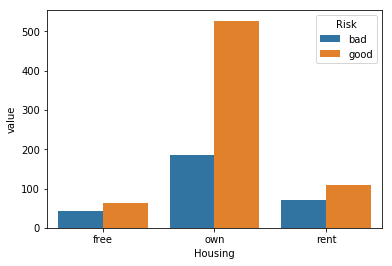

In [23]:
#Plotting between risk and housing
risk = german_data['Risk']
housing = german_data['Housing']
ger = pd.DataFrame({'Risk':risk,'Housing':housing})
ct = pd.crosstab(ger.Housing,ger.Risk)
stacked = ct.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.Housing, y=stacked.value, hue=stacked.Risk)

In [24]:
#Plotting between risk and gender
pd.crosstab(german_data['Sex'],german_data['Risk'])

Risk,bad,good
Sex,,
female,109,201
male,191,499


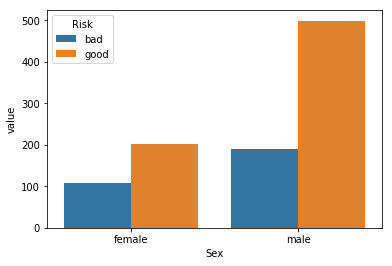

In [25]:
sex = german_data['Sex']
df = pd.DataFrame({'Risk':risk,'Sex':sex})
ct = pd.crosstab(df.Sex,df.Risk)
stacked = ct.stack().reset_index().rename(columns = {0:'value'})
sns.barplot(x=stacked.Sex,y=stacked.value,hue=stacked.Risk)

In [26]:
german_data['Saving accounts'].value_counts()

little           603
No_Saving_Acc    183
moderate         103
quite rich        63
rich              48
Name: Saving accounts, dtype: int64

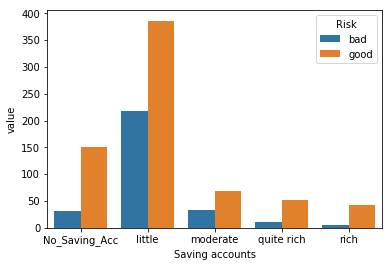

In [27]:
#Plotting between risk and saving account type
saving = german_data['Saving accounts']
df = pd.DataFrame({'Risk':risk,'Saving accounts':saving})
ct = pd.crosstab(df['Saving accounts'],df.Risk)
stacked = ct.stack().reset_index().rename(columns = {0:'value'})
sns.barplot(x=stacked['Saving accounts'],y=stacked.value,hue=stacked.Risk)

In [28]:
german_data['Checking account'].value_counts()

No_Checking_Acc    394
little             274
moderate           269
rich                63
Name: Checking account, dtype: int64

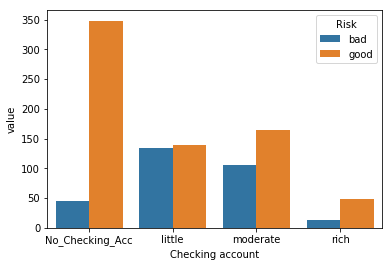

In [29]:
#Plotting between risk and checking account type
saving = german_data['Checking account']
df = pd.DataFrame({'Risk':risk,'Checking account':saving})
ct = pd.crosstab(df['Checking account'],df.Risk)
stacked = ct.stack().reset_index().rename(columns = {0:'value'})
sns.barplot(x=stacked['Checking account'],y=stacked.value,hue=stacked.Risk)

In [30]:
german_data['Job'].value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

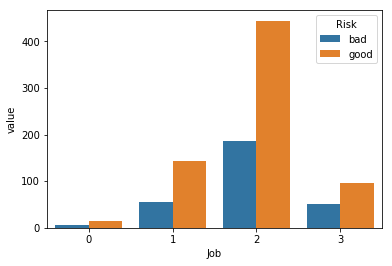

In [31]:
#Plotting between risk and job type
saving = german_data['Job']
df = pd.DataFrame({'Risk':risk,'Job':saving})
ct = pd.crosstab(df['Job'],df.Risk)
stacked = ct.stack().reset_index().rename(columns = {0:'value'})
sns.barplot(x=stacked['Job'],y=stacked.value,hue=stacked.Risk)

In [32]:
german_data['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

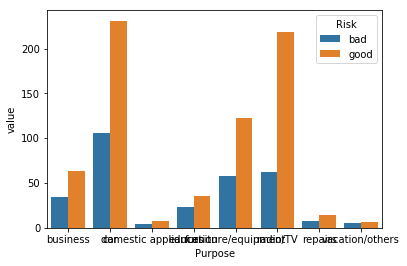

In [33]:
#Plotting between risk and purpose
saving = german_data['Purpose']
df = pd.DataFrame({'Risk':risk,'Purpose':saving})
ct = pd.crosstab(df['Purpose'],df.Risk)
stacked = ct.stack().reset_index().rename(columns = {0:'value'})
sns.barplot(x=stacked['Purpose'],y=stacked.value,hue=stacked.Risk,capsize=None)

In [34]:
dictionary = {
    66:'olde_age',67:'olde_age',68:'olde_age',70:'olde_age',74:'olde_age',75:'olde_age',
    57:'Senior_citz',58:'Senior_citz',59:'Senior_citz',60:'Senior_citz',61:'Senior_citz',62:'Senior_citz',63:'Senior_citz',64:'Senior_citz',65:'Senior_citz',
    46:'up_mid_age',47:'up_mid_age',48:'up_mid_age',49:'up_mid_age',50:'up_mid_age',51:'up_mid_age',52:'up_mid_age',53:'up_mid_age',54:'up_mid_age',55:'up_mid_age',56:'up_mid_age',
    37:'mid_aged',38:'mid_aged',39:'mid_aged',40:'mid_aged',41:'mid_aged',42:'mid_aged',43:'mid_aged',44:'mid_aged',45:'mid_aged',
    19:'Young',20:'Young',21:'Young',22:'Young',23:'Young',24:'Young',25:'Young',26:'Young',27:'Young',
    28:'Adult',29:'Adult',30:'Adult',31:'Adult',32:'Adult',33:'Adult',34:'Adult',35:'Adult',36:'Adult',
}
german_data['Age_Status'] = german_data['Age'].map(dictionary)

In [35]:
german_data['Age_Status'].value_counts()

Adult          336
Young          291
mid_aged       187
up_mid_age     118
Senior_citz     50
olde_age        18
Name: Age_Status, dtype: int64

In [36]:
german_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_Status
0,67,male,2,own,No_Saving_Acc,little,1169,6,radio/TV,good,olde_age
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young
2,49,male,1,own,little,No_Checking_Acc,2096,12,education,good,up_mid_age
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,mid_aged
4,53,male,2,free,little,little,4870,24,car,bad,up_mid_age


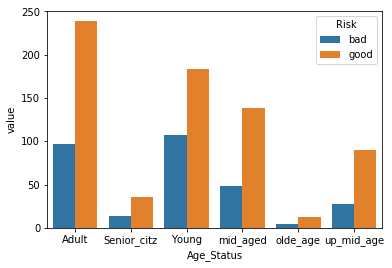

In [37]:
#Plotting between risk and age
saving = german_data['Age_Status']
df = pd.DataFrame({'Risk':risk,'Age_Status':saving})
ct = pd.crosstab(df['Age_Status'],df.Risk)
stacked = ct.stack().reset_index().rename(columns = {0:'value'})
sns.barplot(x=stacked['Age_Status'],y=stacked.value,hue=stacked.Risk,capsize=None)

In [38]:
german_data['Credit amount'].groupby(german_data['Housing']).mean()

Housing
free    4906.212963
own     3060.939691
rent    3122.553073
Name: Credit amount, dtype: float64

In [39]:
german_data['Credit amount'].groupby(german_data['Housing']).sum()

Housing
free     529871
own     2182450
rent     558937
Name: Credit amount, dtype: int64

In [40]:
german_data['Credit amount'].sum()

3271258

In [41]:
german_data['Credit amount'].groupby(german_data['Purpose']).sum()

Purpose
business                403330
car                    1269881
domestic appliances      17976
education               169873
furniture/equipment     555125
radio/TV                696543
repairs                  60018
vacation/others          98512
Name: Credit amount, dtype: int64

In [42]:
pd.crosstab(german_data['Job'],german_data['Purpose'])

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Job,,,,,,,,
0,2,12,1,1,1,2,2,1
1,20,66,1,15,33,57,7,1
2,60,190,10,35,126,195,13,1
3,15,69,0,8,21,26,0,9


In [43]:
pd.crosstab(german_data['Job'],german_data['Saving accounts'])

Saving accounts,No_Saving_Acc,little,moderate,quite rich,rich
Job,,,,,
0,5,13,0,3,1
1,29,128,23,12,8
2,120,366,66,42,36
3,29,96,14,6,3


In [44]:
pd.crosstab(german_data['Sex'],german_data['Saving accounts'])

Saving accounts,No_Saving_Acc,little,moderate,quite rich,rich
Sex,,,,,
female,49,194,32,16,19
male,134,409,71,47,29


In [45]:
german_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_Status
0,67,male,2,own,No_Saving_Acc,little,1169,6,radio/TV,good,olde_age
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young
2,49,male,1,own,little,No_Checking_Acc,2096,12,education,good,up_mid_age
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,mid_aged
4,53,male,2,free,little,little,4870,24,car,bad,up_mid_age


#### Applying the label encoder

In [46]:
le = LabelEncoder()

In [47]:
cat_var = []
num_var= []
for i in german_data.columns:
    if(german_data[i].dtypes=='object') | (len(german_data[i].unique())<=30):
        cat_var.append(i)
    else:
        num_var.append(i)
german_data_cat = german_data.loc[:,cat_var]
german_data_num = german_data.loc[:,num_var]

In [48]:
german_data_encode = german_data_cat.apply(lambda x: le.fit_transform(x), axis=0)

In [49]:
german_data = pd.concat([german_data_num,german_data_encode],axis=1)

In [50]:
german_data.head()

,Age,Credit amount,Duration,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Risk,Age_Status
0,67,1169,6,1,2,1,0,1,5,1,4
1,22,5951,48,0,2,1,1,2,5,0,2
2,49,2096,12,1,1,1,1,0,3,1,5
3,45,7882,42,1,2,0,1,1,4,1,3
4,53,4870,24,1,2,0,1,1,1,0,5


In [51]:
#setting the target and independent variable
x = german_data.drop(columns=['Risk'])
y = german_data['Risk']

### Applying Decision tree

In [52]:
tree = DecisionTreeClassifier()

In [53]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=1234)

In [54]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((700, 10), (300, 10), (700,), (300,))

In [55]:
tree.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [56]:
prediction = tree.predict(test_x)

In [57]:
accuracy_score(prediction,test_y)

0.6733333333333333

### using bagging classifier of decision tree

In [58]:
tree_base = DecisionTreeClassifier()
tree_bagged = BaggingClassifier(base_estimator=tree_base)
tree_bag_param_grid = {'n_estimators':[10,50],
                      'base_estimator__max_depth':[2,3,5,7,9],
                      'base_estimator__criterion':['gini','entropy']}

In [59]:
best_bag_tree = GridSearchCV(estimator=tree_bagged,param_grid=tree_bag_param_grid,n_jobs=-1,cv=5)

In [60]:
best_bag_tree.fit(train_x,train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            ...n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 50], 'base_estimator__max_depth': [2, 3, 5, 7, 9], 'base_estimator__criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
best_bag_predict = best_bag_tree.predict(test_x)

In [62]:
accuracy_score(best_bag_predict,test_y)

0.74

(array([445., 293.,  97.,  80.,  38.,  19.,  14.,   8.,   5.,   1.]),
 array([  250. ,  2067.4,  3884.8,  5702.2,  7519.6,  9337. , 11154.4,
        12971.8, 14789.2, 16606.6, 18424. ]),
 <a list of 10 Patch objects>)

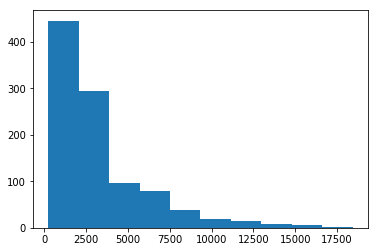

In [63]:
# checking the distributon of credit amount
plt.hist(german_data['Credit amount'])

In [64]:
#apllying the logarthmic to variabke 
german_data['Credit amount'] = np.log(german_data['Credit amount'])

(array([  7.,  16.,  69., 175., 198., 194., 155., 109.,  55.,  22.]),
 array([5.52146092, 5.95145577, 6.38145062, 6.81144547, 7.24144033,
        7.67143518, 8.10143003, 8.53142488, 8.96141974, 9.39141459,
        9.82140944]),
 <a list of 10 Patch objects>)

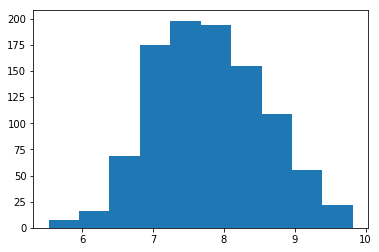

In [65]:
plt.hist(german_data['Credit amount'])

In [66]:
german_data.head()

,Age,Credit amount,Duration,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Risk,Age_Status
0,67,7.063904,6,1,2,1,0,1,5,1,4
1,22,8.691315,48,0,2,1,1,2,5,0,2
2,49,7.647786,12,1,1,1,1,0,3,1,5
3,45,8.972337,42,1,2,0,1,1,4,1,3
4,53,8.490849,24,1,2,0,1,1,1,0,5


In [67]:
german_data['Age'] = le.fit_transform(german_data['Age'])

### Applying the dummies to categorical values

In [68]:
german_data = pd.get_dummies(german_data,columns=['Sex','Job','Housing','Saving accounts','Checking account','Purpose'])

In [69]:
german_data.head()

,Age,Credit amount,Duration,Risk,Age_Status,Sex_0,Sex_1,Job_0,Job_1,Job_2,...,Checking account_2,Checking account_3,Purpose_0,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7
0,48,7.063904,6,1,4,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,3,8.691315,48,0,2,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,30,7.647786,12,1,5,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,26,8.972337,42,1,3,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,34,8.490849,24,0,5,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [70]:
german_data.shape

(1000, 31)

## Using grid search

In [71]:
x = german_data.drop(columns=['Risk'])
y = german_data['Risk']

For decision tree

In [72]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=1234)

In [73]:
train_x.shape,test_x.shape,train_y.shape

((700, 30), (300, 30), (700,))

In [74]:
tree_base = DecisionTreeClassifier()
#tree_bagged = BaggingClassifier(base_estimator=tree_base)
tree_param_grid = {'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],'criterion':['gini','entropy',]}

In [80]:
best_bag_tree = GridSearchCV(estimator=tree_base,param_grid=tree_param_grid,n_jobs=-1,cv=5,scoring="accuracy")
best_bag_tree.fit(train_x,train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [81]:
best_bag_predict = best_bag_tree.predict(test_x)

In [82]:
accuracy_score(best_bag_predict,test_y)

0.6633333333333333

For random forest

In [83]:
rf = RandomForestClassifier()

In [84]:
param_grid = {'n_estimators': [200, 700],'max_features': ['auto', 'sqrt', 'log2']}

In [85]:
best_bag_tree_rf = GridSearchCV(estimator=rf,param_grid=param_grid,n_jobs=-1,cv=5)

In [86]:
best_bag_tree_rf.fit(train_x,train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [200, 700], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [87]:
best_bag_predict_rf = best_bag_tree_rf.predict(test_x)

In [88]:
accuracy_score(best_bag_predict_rf,test_y)

0.73

for knn classification

In [89]:
knn = KNeighborsClassifier()
knn_param_grid_new1 = {'n_neighbors':np.arange(1,50,2),'weights':['uniform','distance'],'p':[1,2]}

In [90]:
best_kn_reg = GridSearchCV(knn,param_grid=knn_param_grid_new1,cv=5,n_jobs=5)
best_kn_reg.fit(train_x,train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=5,
       param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]), 'weights': ['uniform', 'distance'], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [91]:
predict_knn = best_kn_reg.predict(test_x)

In [92]:
accuracy_score(predict_knn,test_y)

0.7066666666666667

Using xg boost

In [99]:
model = XGBClassifier(xgb = XGBClassifier(learning_rate=0.02, n_estimators=300, objective='binary:logistic',silent=True, nthread=1))

In [100]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [107]:
folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

In [110]:
random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=param_comb, 
                                   scoring='roc_auc', n_jobs=4, cv=skf.split(x,y), verbose=3, random_state=1001 )

In [112]:
random_search.fit(x, y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    4.3s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x0000021F1D97B9E8>,
          error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
...,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)),
          fit_params=None, iid=True, n_iter=5, n_jobs=4,
          param_distributions={'min_child_weight': [1, 5, 10], 'gamma': [0.5, 1, 1.5, 2, 5], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=1001, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [113]:
xg_predict = random_search.predict(test_x)

C:\Users\palva\Anaconda3.1\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



In [114]:
accuracy_score(xg_predict,test_y)

0.89